In [ ]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', color_codes=True)

In [ ]:
from scipy.stats import skew

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.metrics import accuracy_score

In [ ]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
df_red = pd.read_csv('winequality-red.csv', sep=';')
df_white = pd.read_csv('winequality-white.csv', sep=';')

In [ ]:
print(df_red.shape)
print(df_white.shape)

(1599, 12)
(4898, 12)


In [ ]:
print(df_red.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [ ]:
print(df_red.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [ ]:
print(f'Red wine quality scores: {sorted(df_red["quality"].unique())}')
print(f'White wine quality scores: {sorted(df_white["quality"].unique())}')

Red wine quality scores: [3, 4, 5, 6, 7, 8]
White wine quality scores: [3, 4, 5, 6, 7, 8, 9]


In [ ]:
df_red['category'] = 'red'
df_white['category'] = 'white'

In [ ]:
df_red['quality label'] = df_red['quality'].apply(
    lambda value: 'low' if value <= 5 else ('high' if value > 7 else 'medium'))
df_red['quality label'] = pd.Categorical(df_red['quality label'], categories=['low', 'medium', 'high'])

In [ ]:
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category,quality label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,low
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,low
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,low
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,medium
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red,low
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red,medium
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red,medium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red,low


In [ ]:
df_white['quality label'] = df_white['quality'].apply(
    lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')
df_white['quality label'] = pd.Categorical(df_white['quality label'], categories=['low', 'medium', 'high'])

In [ ]:
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category,quality label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,medium
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,low
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,medium
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,medium


In [ ]:
print(f'Red wine:\n{df_red["quality label"].value_counts()}\n')
print(f'White wine:\n{df_white["quality label"].value_counts()}')

Red wine:
medium    837
low       744
high       18
Name: quality label, dtype: int64

White wine:
medium    3078
low       1640
high       180
Name: quality label, dtype: int64


In [ ]:
df_wines = pd.concat([df_red, df_white])
df_wines = df_wines.sample(frac=1.0, random_state=42).reset_index(drop=True)

In [ ]:
df_wines.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category,quality label
0,7.0,0.170,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.20,8,white,high
1,7.7,0.640,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.90,5,red,low
2,6.8,0.390,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.00,7,white,medium
3,6.3,0.280,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.50,6,white,medium
4,7.4,0.350,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.90,6,white,medium
5,7.2,0.530,0.14,2.1,0.064,15.0,29.0,0.99323,3.35,0.61,12.10,6,red,medium
6,7.5,0.270,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.20,5,white,low
7,6.8,0.110,0.27,8.6,0.044,45.0,104.0,0.99454,3.20,0.37,9.90,6,white,medium
8,9.0,0.440,0.49,2.4,0.078,26.0,121.0,0.99780,3.23,0.58,9.20,5,red,low
9,7.1,0.230,0.30,2.6,0.034,62.0,148.0,0.99121,3.03,0.56,11.30,7,white,medium


In [ ]:
print(df_wines.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  category              6497 non-null   object  
 13  quality label         6497 non-null   category
dtypes: category(1), float64(11), int64(1), object(1)
memory 

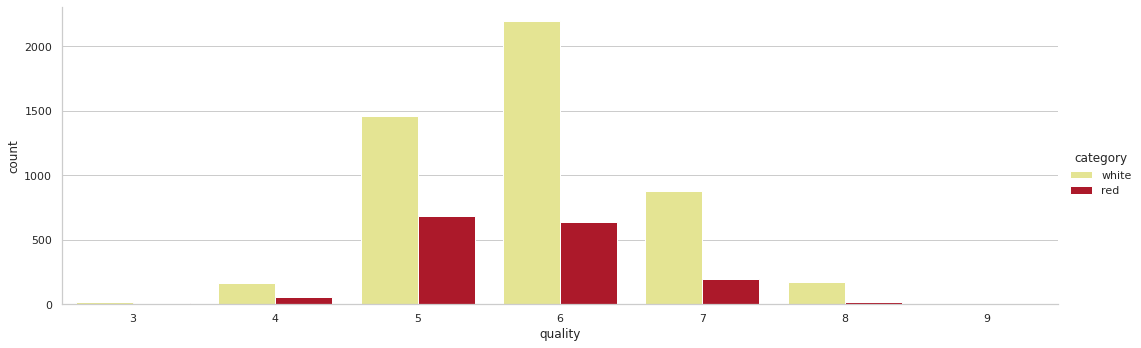

In [ ]:
sns.catplot(x="quality", data=df_wines, aspect=3.0, kind='count', hue='category',
            palette={'red': '#C50017', 'white': '#F1F285'})

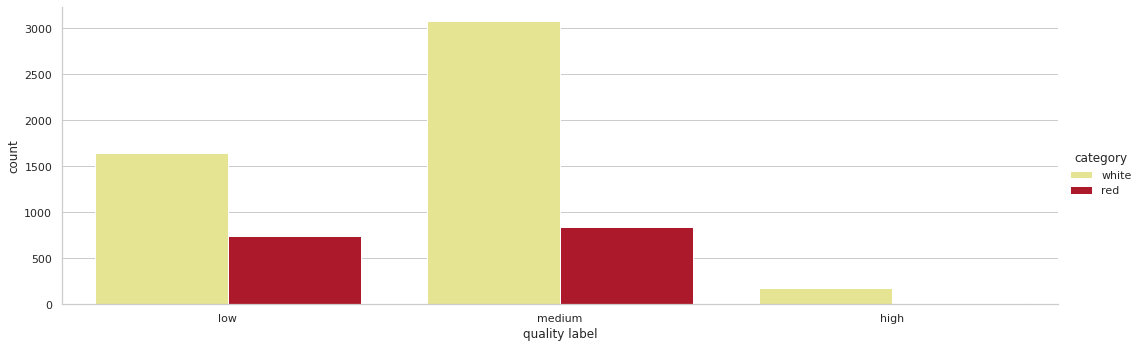

In [ ]:
sns.catplot(x="quality label", data=df_wines, aspect=3.0, kind='count', hue='category',
            palette={'red': '#C50017', 'white': '#F1F285'})

In [ ]:
subset_attributes = df_wines.columns
rs = round(df_wines.loc[df_wines.category == 'red', subset_attributes].describe(), 2)
ws = round(df_wines.loc[df_wines.category == 'white', subset_attributes].describe(), 2)
pd.concat([rs, ws], axis=0, keys=['Red Wine Statistics', 'White Wine Statistics']).T

Red Wine Statistics                                    \
                                   count   mean    std   min    25%    50%   
fixed acidity                     1599.0   8.32   1.74  4.60   7.10   7.90   
volatile acidity                  1599.0   0.53   0.18  0.12   0.39   0.52   
citric acid                       1599.0   0.27   0.19  0.00   0.09   0.26   
residual sugar                    1599.0   2.54   1.41  0.90   1.90   2.20   
chlorides                         1599.0   0.09   0.05  0.01   0.07   0.08   
free sulfur dioxide               1599.0  15.87  10.46  1.00   7.00  14.00   
total sulfur dioxide              1599.0  46.47  32.90  6.00  22.00  38.00   
density                           1599.0   1.00   0.00  0.99   1.00   1.00   
pH                                1599.0   3.31   0.15  2.74   3.21   3.31   
sulphates                         1599.0   0.66   0.17  0.33   0.55   0.62   
alcohol                           1599.0  10.42   1.07  8.40   9.50  10.20   
quality                           1599.0   5.64   0.81  3.00   5.00   6.00   

                                    White Wine Statistics                 \
                        75%     max                 count    mean    std   
fixed acidity          9.20   15.90                4898.0    6.85   0.84   
volatile acidity       0.64    1.58                4898.0    0.28   0.10   
citric acid            0.42    1.00                4898.0    0.33   0.12   
residual sugar         2.60   15.50                4898.0    6.39   5.07   
chlorides              0.09    0.61                4898.0    0.05   0.02   
free sulfur dioxide   21.00   72.00                4898.0   35.31  17.01   
total sulfur dioxide  62.00  289.00                4898.0  138.36  42.50   
density                1.00    1.00                4898.0    0.99   0.00   
pH                     3.40    4.01                4898.0    3.19   0.15   
sulphates              0.73    2.00                4898.0    0.49   0.11   
alcohol               11.10   14.90                4898.0   10.51   1.23   
quality                6.00    8.00                4898.0    5.88   0.89   

                                                            
                       min     25%     50%     75%     max  
fixed acidity         3.80    6.30    6.80    7.30   14.20  
volatile acidity      0.08    0.21    0.26    0.32    1.10  
citric acid           0.00    0.27    0.32    0.39    1.66  
residual sugar        0.60    1.70    5.20    9.90   65.80  
chlorides             0.01    0.04    0.04    0.05    0.35  
free sulfur dioxide   2.00   23.00   34.00   46.00  289.00  
total sulfur dioxide  9.00  108.00  134.00  167.00  440.00  
density               0.99    0.99    0.99    1.00    1.04  
pH                    2.72    3.09    3.18    3.28    3.82  
sulphates             0.22    0.41    0.47    0.55    1.08  
alcohol               8.00    9.50   10.40   11.40   14.20  
quality               3.00    5.00    6.00    6.00    9.00

In [ ]:
subset_attributes = ['alcohol', 'free sulfur dioxide',
                     'volatile acidity', 'chlorides', 'quality']

low = round(df_wines[df_wines['quality label'] == 'low'][subset_attributes].describe(), 2)
medium = round(df_wines[df_wines['quality label'] == 'medium'][subset_attributes].describe(), 2)
high = round(df_wines[df_wines['quality label'] == 'high'][subset_attributes].describe(), 2)

pd.concat([low, medium, high], axis=1, keys=['👎 Low quality wine', '👌 Medium quality wine', '👍 High quality wine'])

👎 Low quality wine                                                 \
                 alcohol free sulfur dioxide volatile acidity chlorides   
count            2384.00             2384.00          2384.00   2384.00   
mean                9.87               29.48             0.40      0.06   
std                 0.84               19.84             0.19      0.04   
min                 8.00                2.00             0.10      0.01   
25%                 9.30               14.00             0.26      0.04   
50%                 9.60               26.00             0.34      0.05   
75%                10.40               42.00             0.50      0.08   
max                14.90              289.00             1.58      0.61   

               👌 Medium quality wine                                       \
       quality               alcohol free sulfur dioxide volatile acidity   
count  2384.00               3915.00             3915.00          3915.00   
mean      4.88                 10.81               30.96             0.31   
std       0.36                  1.20               16.33             0.14   
min       3.00                  8.40                1.00             0.08   
25%       5.00                  9.80               19.00             0.21   
50%       5.00                 10.80               29.00             0.27   
75%       5.00                 11.70               41.00             0.36   
max       5.00                 14.20              112.00             1.04   

                         👍 High quality wine                      \
      chlorides  quality             alcohol free sulfur dioxide   
count   3915.00  3915.00              198.00              198.00   
mean       0.05     6.28               11.69               34.51   
std        0.03     0.45                1.27               17.08   
min        0.01     6.00                8.50                3.00   
25%        0.04     6.00               11.00               24.00   
50%        0.04     6.00               12.00               34.00   
75%        0.06     7.00               12.60               43.00   
max        0.42     7.00               14.00              105.00   

                                          
      volatile acidity chlorides quality  
count           198.00    198.00  198.00  
mean              0.29      0.04    8.03  
std               0.12      0.02    0.16  
min               0.12      0.01    8.00  
25%               0.21      0.03    8.00  
50%               0.28      0.04    8.00  
75%               0.35      0.04    8.00  
max               0.85      0.12    9.00

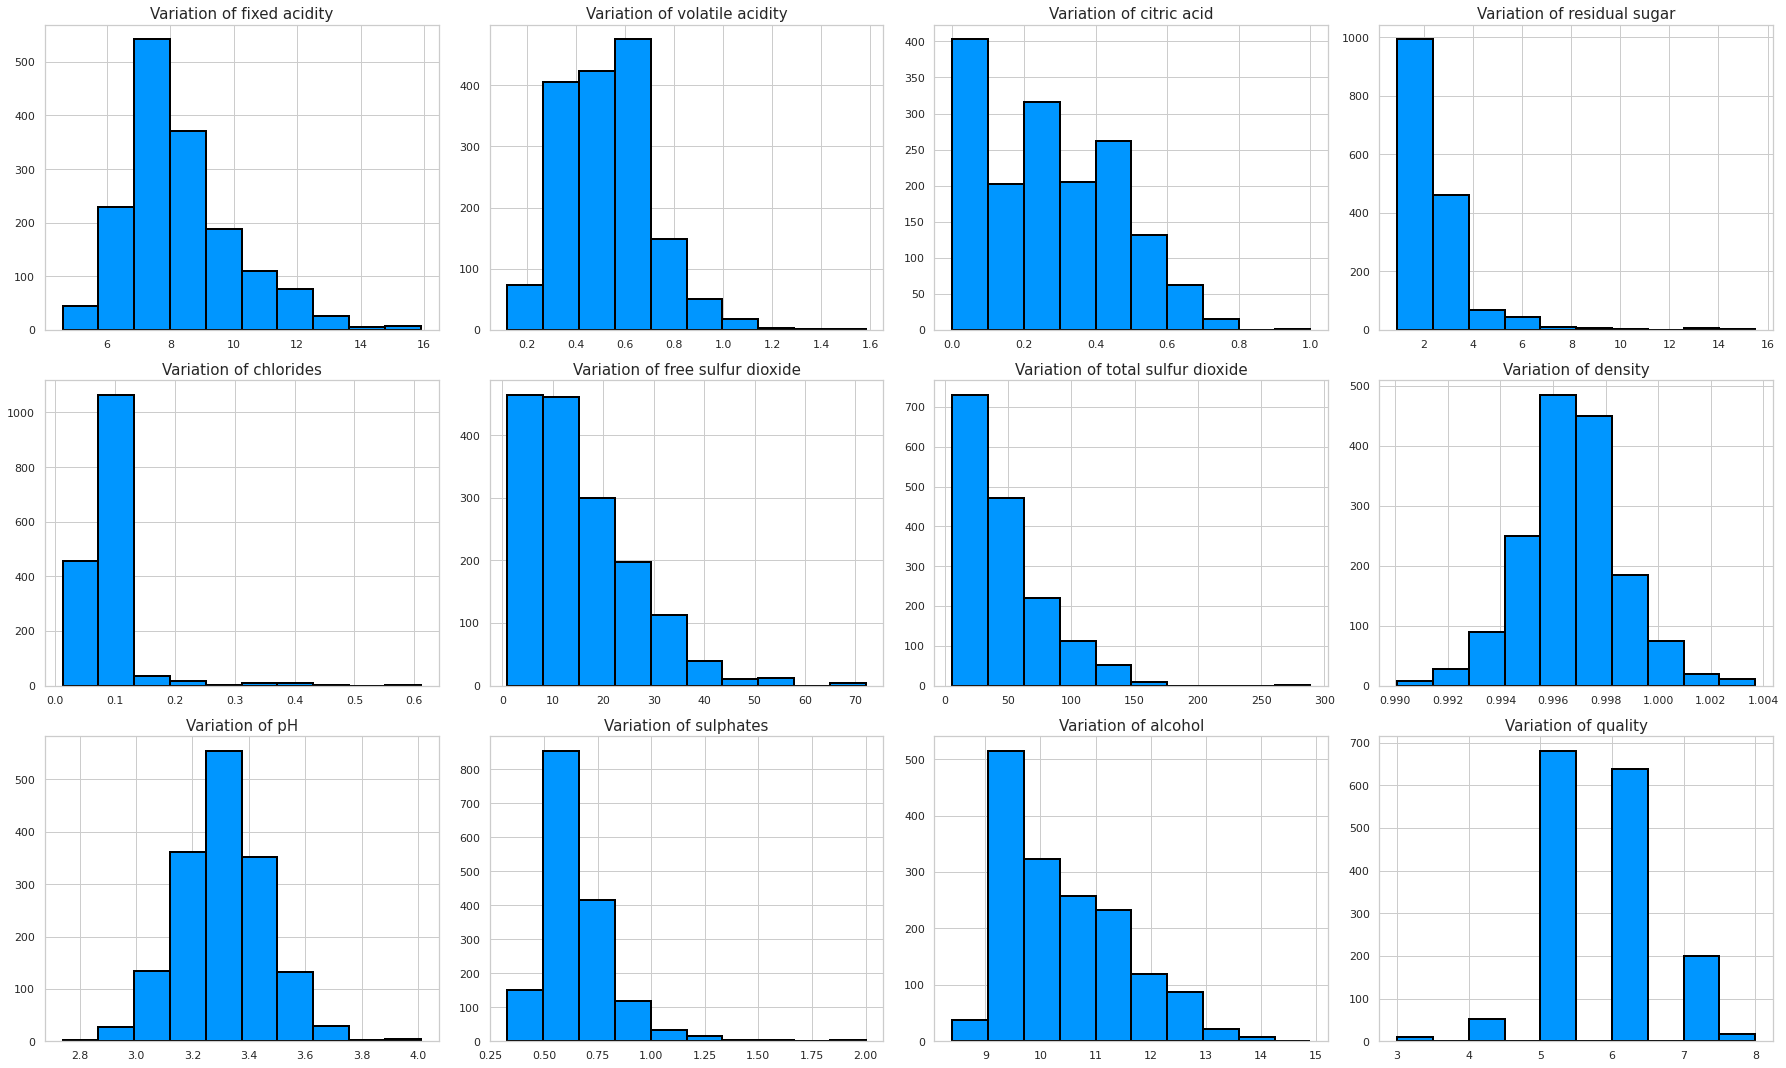

In [ ]:
figure, axes = plt.subplots(3, 4, figsize=(25, 15))
columns = list(df_wines.columns)

for i in range(3):
    for j in range(4):
        axes[i, j].hist(x=columns[4 * i + j], data=df_red, edgecolor='#000000', linewidth=2, color='#0096FF')
        axes[i, j].set_title('Variation of ' + columns[4 * i + j], size=15)
figure.tight_layout()

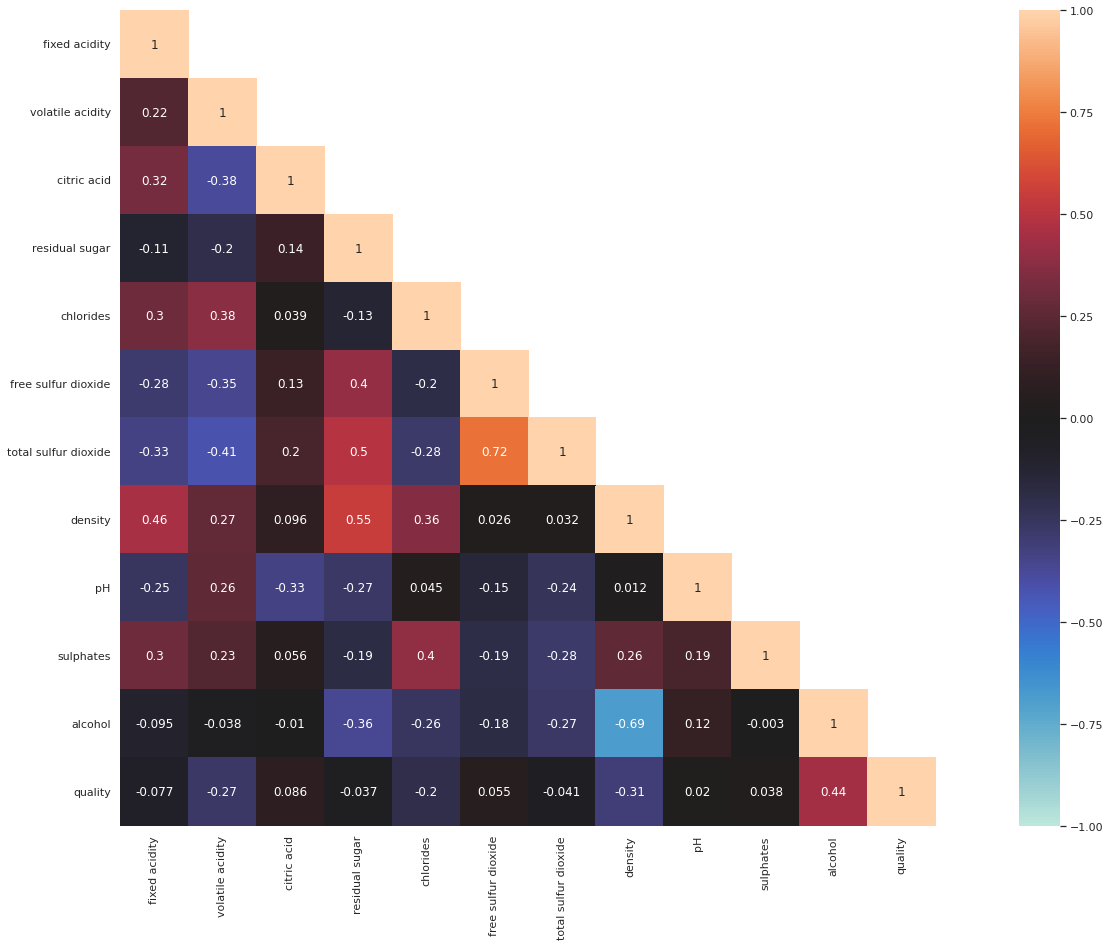

In [ ]:
correlation_matrix = df_wines.corr()
mask = np.array(correlation_matrix)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(30, 15)
sns.heatmap(data=correlation_matrix, mask=mask, square=True, annot=True, cbar=True, vmin=-1, vmax=1,
            cmap=sns.color_palette("icefire", as_cmap=True))

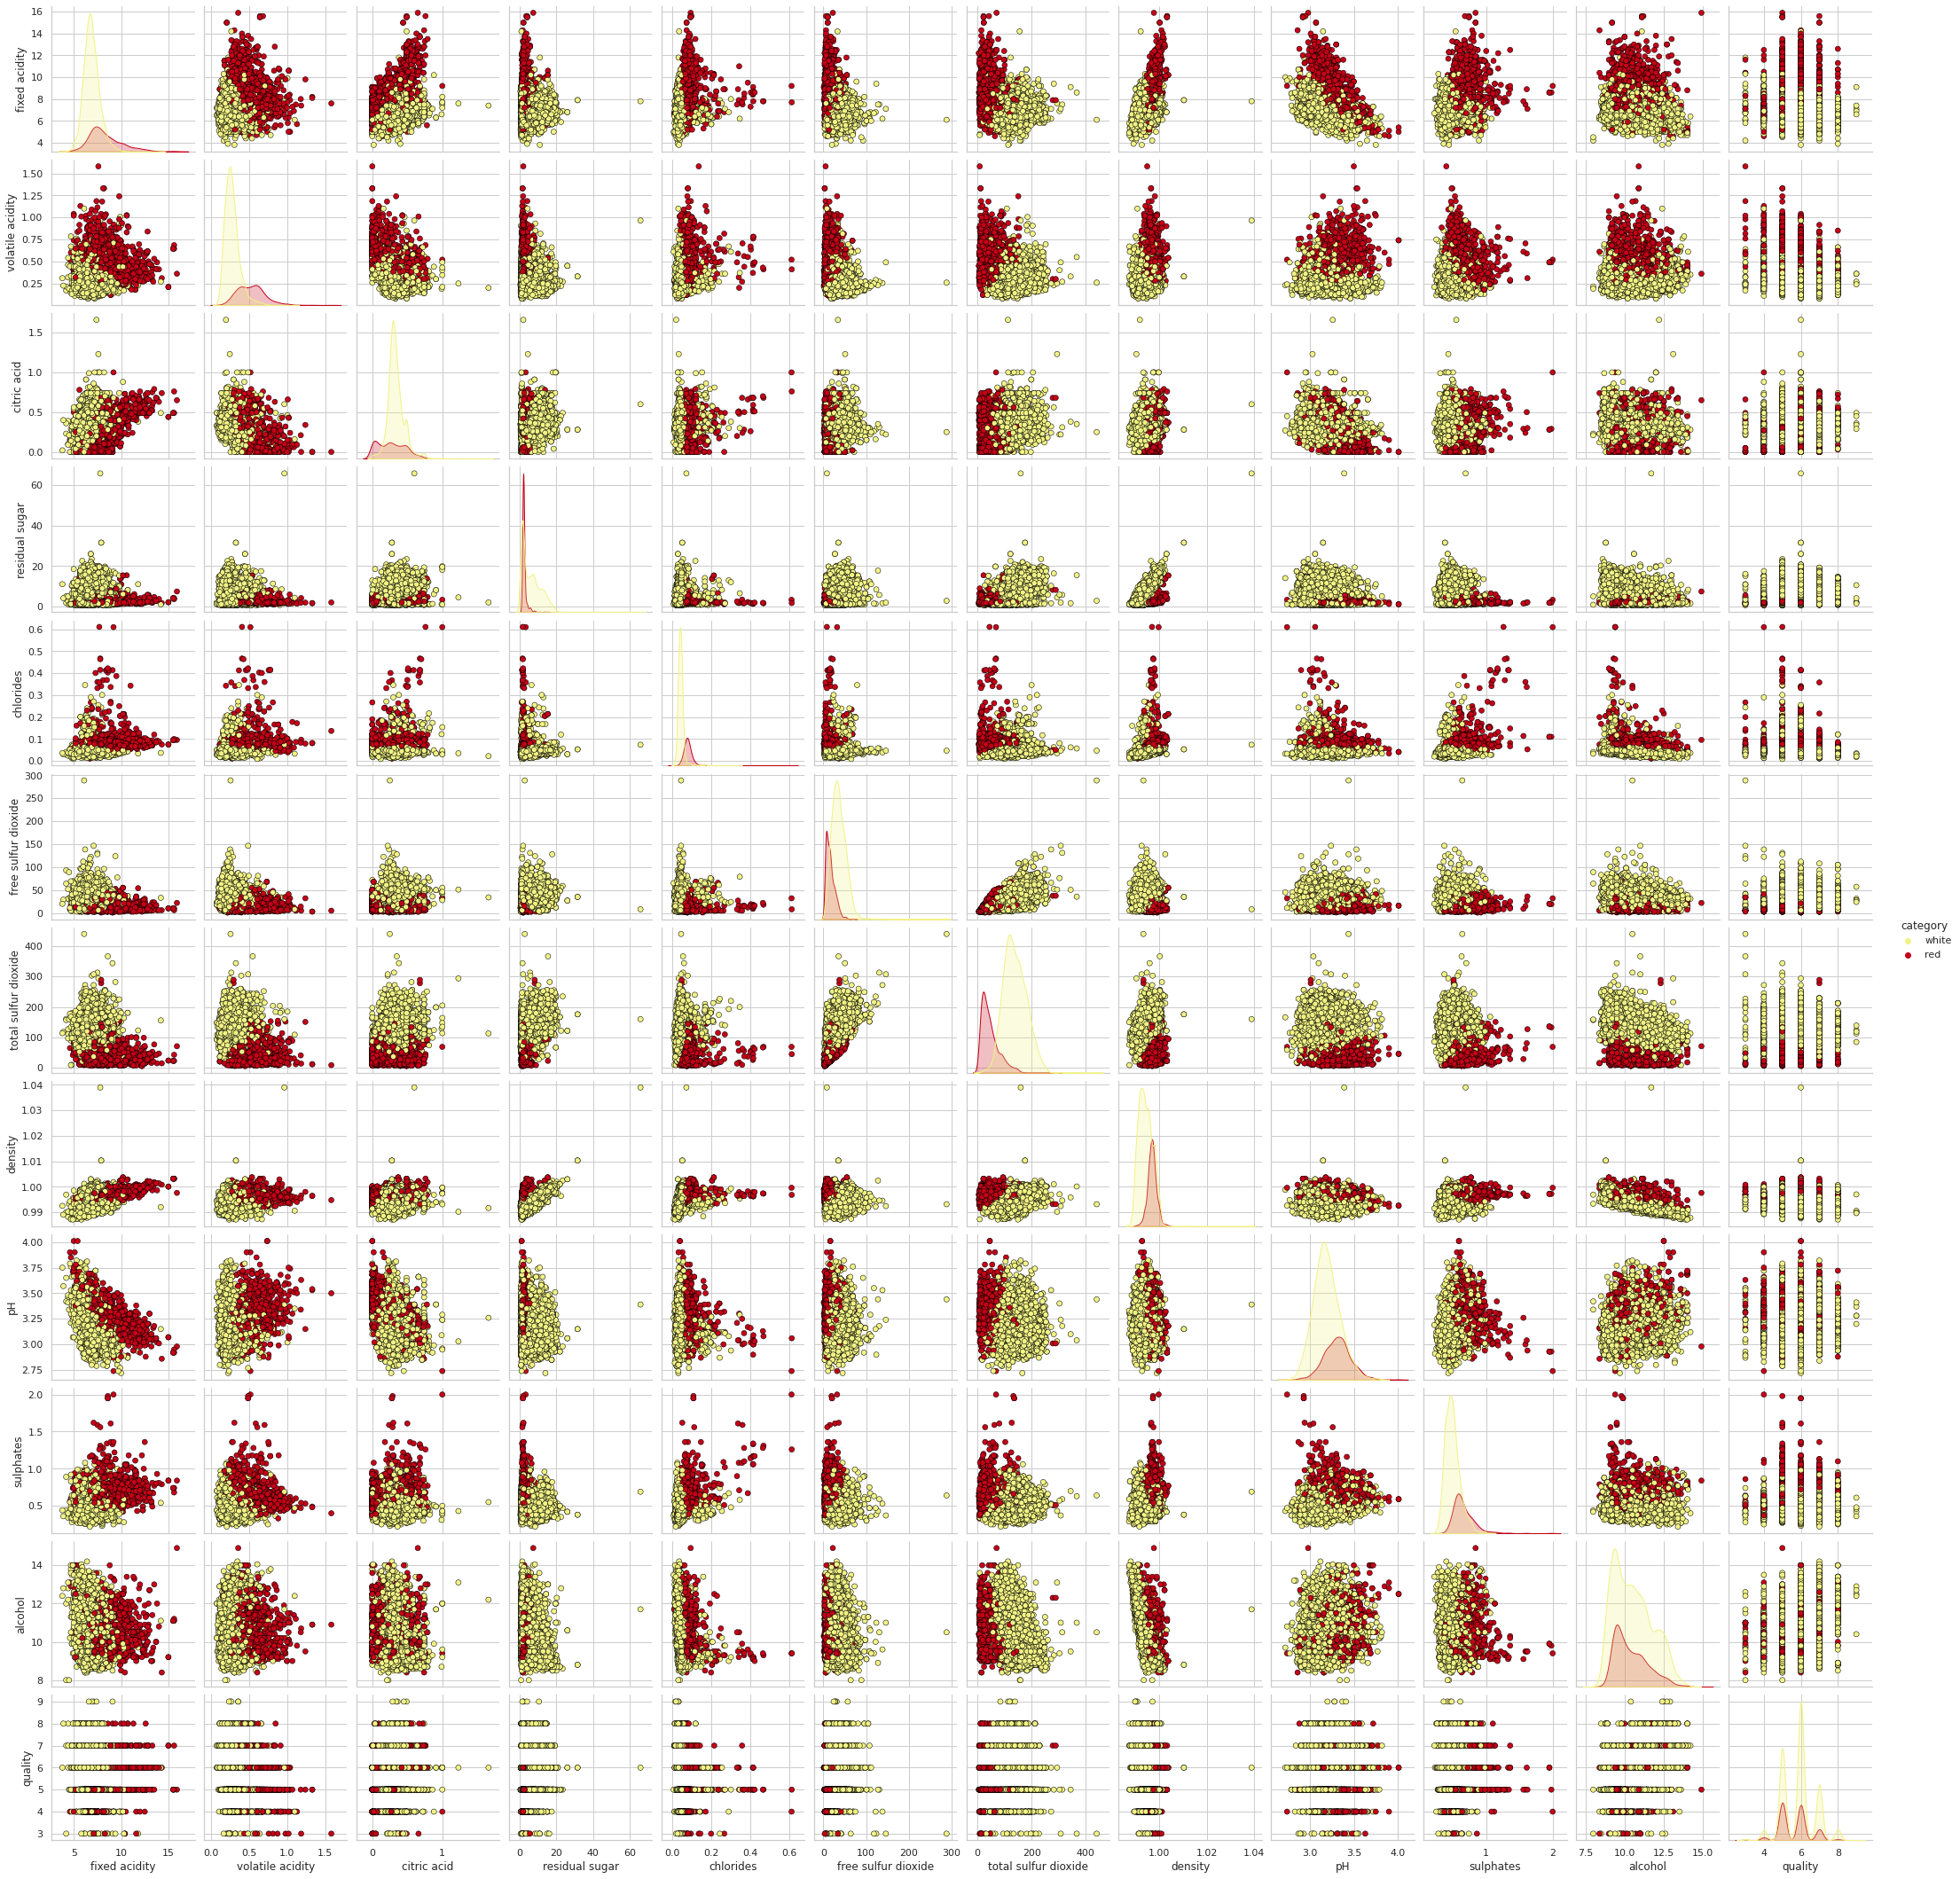

In [ ]:
sns.pairplot(data=df_wines, aspect=1, hue='category', palette={'red': '#C50017', 'white': '#F1F285'},
             plot_kws=dict(edgecolor='black', linewidth=0.5))

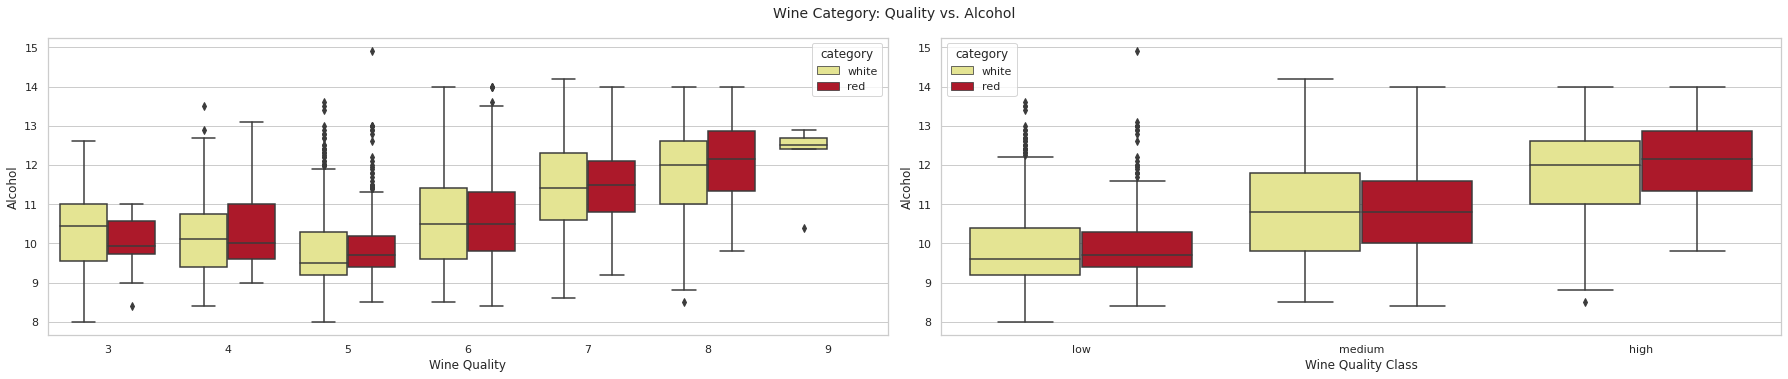

In [ ]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 5))

figure.suptitle('Wine Category: Quality vs. Alcohol', y=1.05, fontsize=14)

ax1 = sns.boxplot(x='quality', y='alcohol', data=df_wines, hue='category',
                  palette={'red': '#C50017', 'white': '#F1F285'}, ax=ax1)
ax1.set_xlabel("Wine Quality", size=12)
ax1.set_ylabel("Alcohol", size=12)

ax2 = sns.boxplot(x='quality label', y='alcohol', data=df_wines, hue='category',
                  palette={'red': '#C50017', 'white': '#F1F285'}, ax=ax2)
ax2.set_xlabel("Wine Quality Class")
ax2.set_ylabel("Alcohol", size=12)

figure.tight_layout()

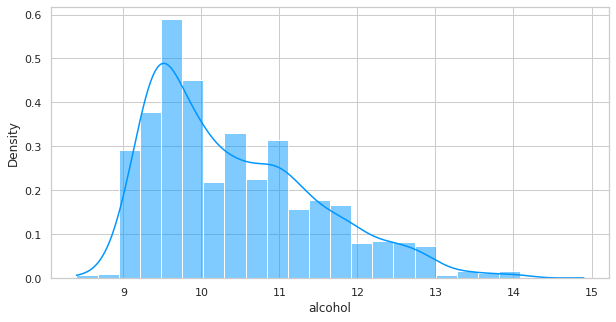

In [ ]:
plt.figure(figsize=(10,5))
ax =sns.histplot(df_red['alcohol'], stat='density', kde=True, color='#0096FF')

In [ ]:
print(f'Skew: {skew(df_wines["alcohol"])}')

Skew: 0.5655871101943124


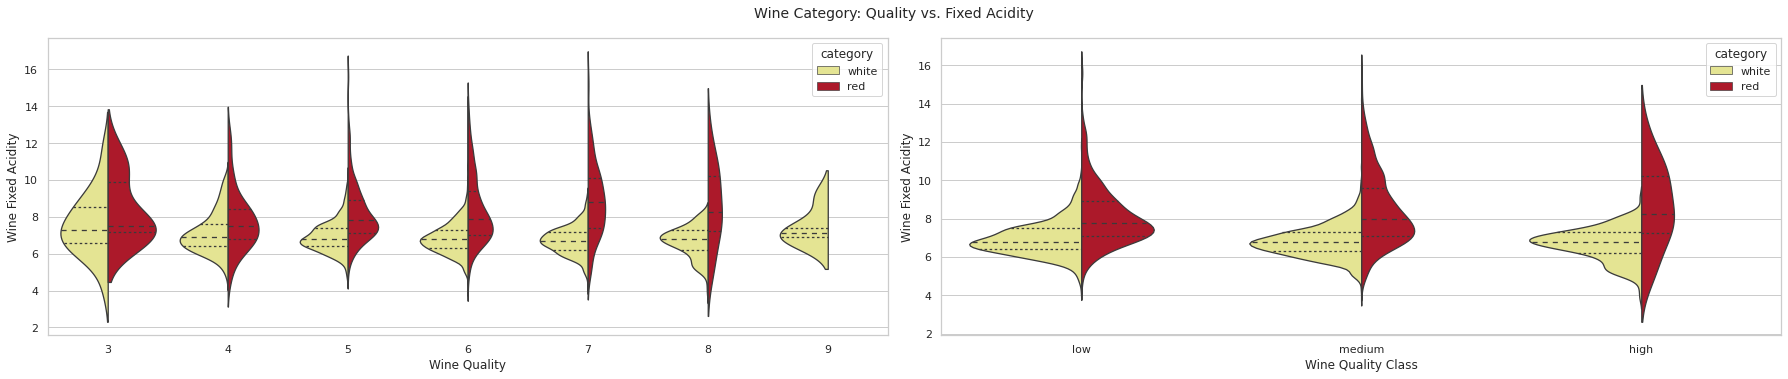

In [ ]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 5))

figure.suptitle('Wine Category: Quality vs. Fixed Acidity', y=1.05, fontsize=14)

sns.violinplot(x='quality', y='fixed acidity', hue='category', data=df_wines, split=True, inner='quart', linewidth=1.3,
               palette={'red': '#C50017', 'white': '#F1F285'}, ax=ax1)
ax1.set_xlabel("Wine Quality", size=12)
ax1.set_ylabel("Wine Fixed Acidity", size=12)

sns.violinplot(x='quality label', y='fixed acidity', hue='category', data=df_wines, split=True, inner='quart',
               linewidth=1.3,
               palette={'red': '#C50017', 'white': '#F1F285'}, ax=ax2)
ax2.set_xlabel("Wine Quality Class", size=12)
ax2.set_ylabel("Wine Fixed Acidity", size=12)

figure.tight_layout()

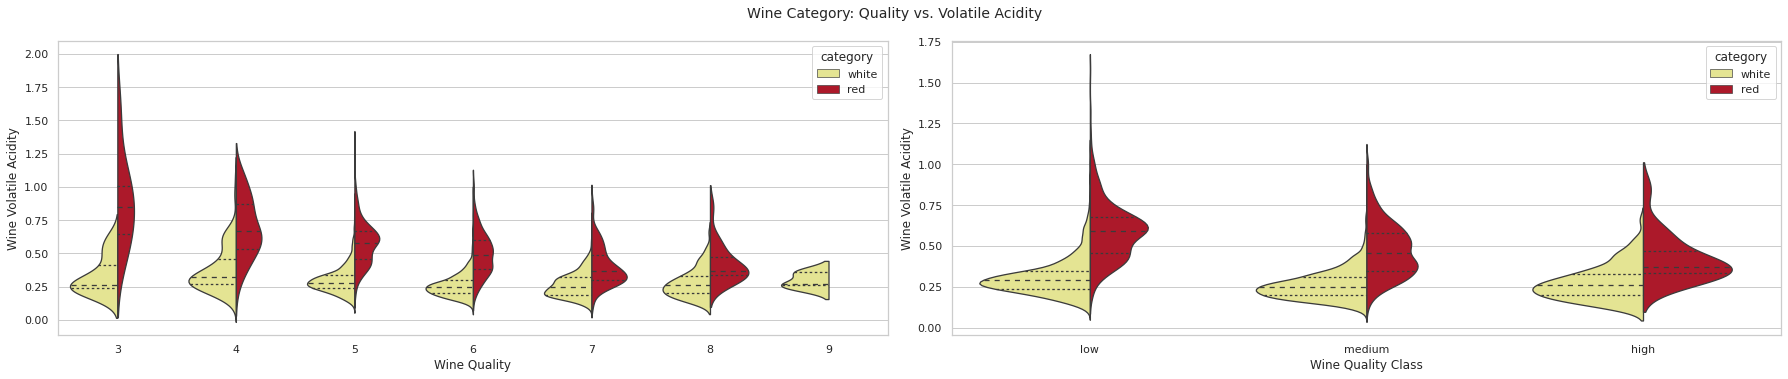

In [ ]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 5))
figure.suptitle('Wine Category: Quality vs. Volatile Acidity', y=1.05, fontsize=14)

sns.violinplot(x='quality', y='volatile acidity', hue='category', data=df_wines, split=True, inner='quart',
               linewidth=1.3, palette={'red': '#C50017', 'white': '#F1F285'}, ax=ax1)
ax1.set_xlabel("Wine Quality", size=12)
ax1.set_ylabel("Wine Volatile Acidity", size=12)

sns.violinplot(x='quality label', y='volatile acidity', hue='category', data=df_wines, split=True, inner='quart',
               linewidth=1.3, palette={'red': '#C50017', 'white': '#F1F285'}, ax=ax2)

ax2.set_xlabel("Wine Quality Class", size=12)
ax2.set_ylabel("Wine Volatile Acidity", size=12)

figure.tight_layout()

In [ ]:
label_quality = LabelEncoder()
df_wines['quality label'] = label_quality.fit_transform(df_wines['quality label'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_wines.drop(['quality', 'category'], axis=1),
                                                    df_wines['quality label'], test_size=0.25,
                                                    random_state=42)

In [ ]:
models = [LogisticRegression(), LinearSVC(), SVC(kernel='rbf'), KNeighborsClassifier(), RandomForestClassifier(),
          DecisionTreeClassifier(), GradientBoostingClassifier(), GaussianNB()]

model_names = ['LogisticRegression', 'LinearSVC', 'SVC', 'KNeighborsClassifier', 'RandomForestClassifier',
               'DecisionTreeClassifier', 'GradientBoostingClassifier', 'GaussianNB']

In [ ]:
acc = []
eval_acc = {}

for model in range(len(models)):
    classification_model = models[model]
    classification_model.fit(x_train, y_train)
    prediction = classification_model.predict(x_test)
    acc.append(accuracy_score(prediction, y_test))

eval_acc = {'Modeling algorithm': model_names, 'Accuracy': acc}

In [ ]:
accuracy_df = pd.DataFrame.from_dict(eval_acc)

In [ ]:
accuracy_df

,Modeling algorithm,Accuracy
0,LogisticRegression,0.964923
1,LinearSVC,0.971692
2,SVC,0.612923
3,KNeighborsClassifier,0.699692
4,RandomForestClassifier,1.000000
5,DecisionTreeClassifier,1.000000
6,GradientBoostingClassifier,1.000000
7,GaussianNB,1.000000


In [ ]:
def scale(x_train, x_test, y_train, y_test, scaler_name):
    models = [LogisticRegression(), LinearSVC(), SVC(kernel='rbf'), KNeighborsClassifier(),
              RandomForestClassifier(), DecisionTreeClassifier(), GradientBoostingClassifier(),
              GaussianNB()]

    x_train_scaled = scaler_name.fit_transform(x_train)
    x_test_scaled = scaler_name.fit_transform(x_test)

    acc_scores = []

    for model in range(len(models)):
        clf = models[model]
        clf.fit(x_train_scaled, y_train)
        pred = clf.predict(x_test_scaled)
        acc_scores.append(accuracy_score(pred, y_test))

    accuracy_df[str(scaler_name).strip('()')] = np.array(acc_scores)

In [ ]:
s1 = scale(x_train, x_test, y_train, y_test, StandardScaler())

In [ ]:
s2 = scale(x_train, x_test, y_train, y_test, MinMaxScaler())

In [ ]:
accuracy_df

,Modeling algorithm,Accuracy,StandardScaler,MinMaxScaler
0,LogisticRegression,0.964923,1.000000,0.998154
1,LinearSVC,0.971692,0.982769,0.982154
2,SVC,0.612923,1.000000,1.000000
3,KNeighborsClassifier,0.699692,0.996308,1.000000
4,RandomForestClassifier,1.000000,1.000000,1.000000
5,DecisionTreeClassifier,1.000000,1.000000,1.000000
6,GradientBoostingClassifier,1.000000,1.000000,1.000000
7,GaussianNB,1.000000,1.000000,1.000000


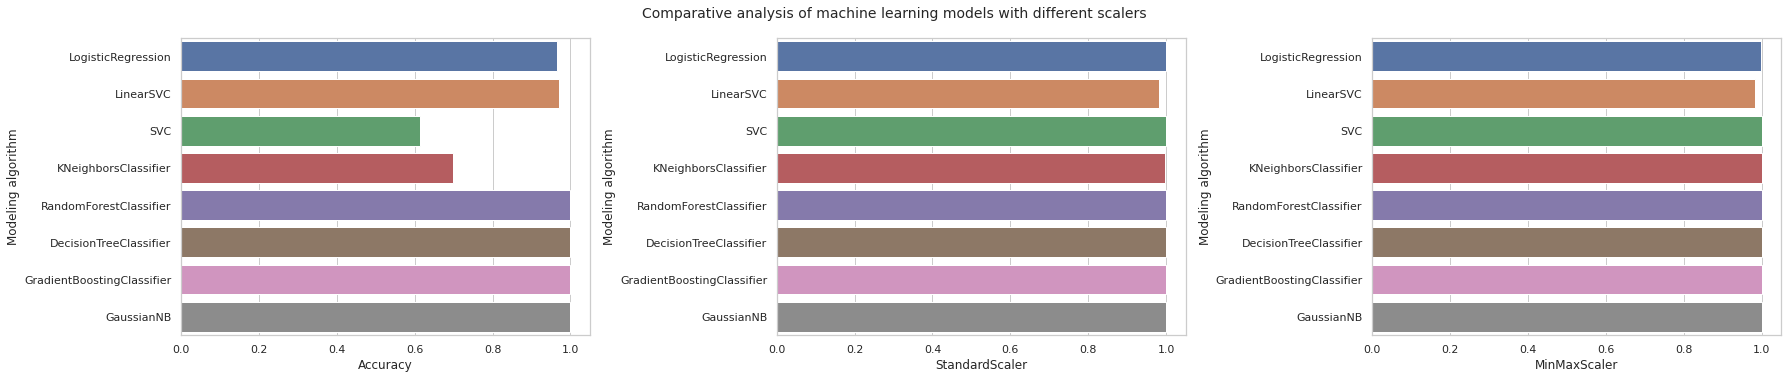

In [ ]:
figure, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 5))

figure.suptitle('Comparative analysis of machine learning models with different scalers', y=1.05, fontsize=14)

sns.barplot(y='Modeling algorithm', x='Accuracy', data=accuracy_df, ax=ax1)
sns.barplot(y='Modeling algorithm', x='StandardScaler', data=accuracy_df, ax=ax2)
sns.barplot(y='Modeling algorithm', x='MinMaxScaler', data=accuracy_df, ax=ax3)

plt.tight_layout()